In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#%pip install mlxtend

In [2]:
Df=pd.read_csv('C:/Users/Hüseyin/Desktop/DataSets/Job_Placement_Data.csv')
Df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [3]:
Df.describe().T

,count,mean,std,min,25%,50%,75%,max
ssc_percentage,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_percentage,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_percentage,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
emp_test_percentage,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_percent,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89


In [4]:
Df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,215,2,M,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ssc_percentage,215.0,NaN,NaN,NaN,67.303395,10.827205,40.89,60.6,67.0,75.7,89.4
ssc_board,215,2,Central,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsc_percentage,215.0,NaN,NaN,NaN,66.333163,10.897509,37.0,60.9,65.0,73.0,97.7
hsc_board,215,2,Others,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsc_subject,215,3,Commerce,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree_percentage,215.0,NaN,NaN,NaN,66.370186,7.358743,50.0,61.0,66.0,72.0,91.0
undergrad_degree,215,3,Comm&Mgmt,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_experience,215,2,No,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_test_percentage,215.0,NaN,NaN,NaN,72.100558,13.275956,50.0,60.0,71.0,83.5,98.0


In [5]:
Df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [6]:
Df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [7]:
Df.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

# Exploring categorical features

In [8]:
categorical_features=Df.select_dtypes(include='object')
categorical_features

,gender,ssc_board,hsc_board,hsc_subject,undergrad_degree,work_experience,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [9]:
categorical_features.nunique()

gender              2
ssc_board           2
hsc_board           2
hsc_subject         3
undergrad_degree    3
work_experience     2
specialisation      2
status              2
dtype: int64

In [10]:
for k in categorical_features.columns:
    print(categorical_features[k].unique())


['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


Checking out the categorical values and their disportions to get a some meaningful insight

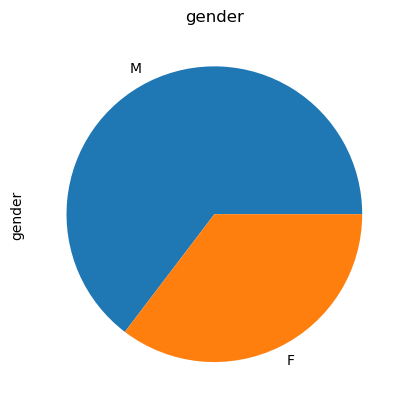

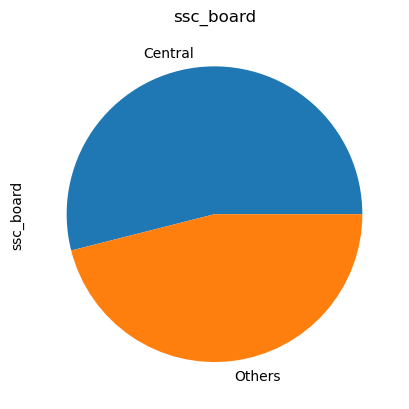

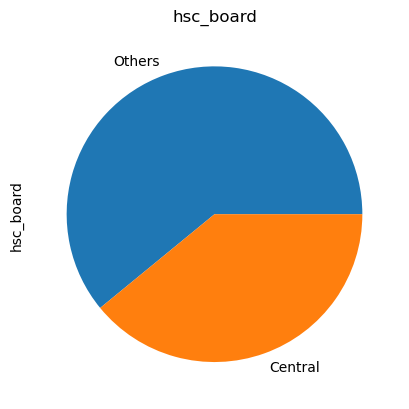

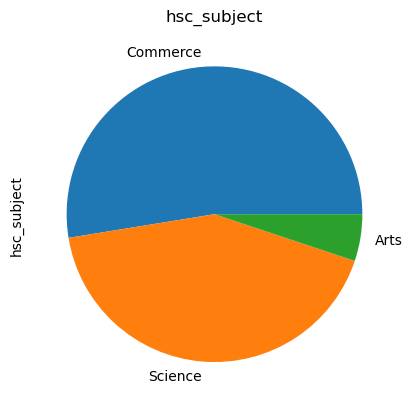

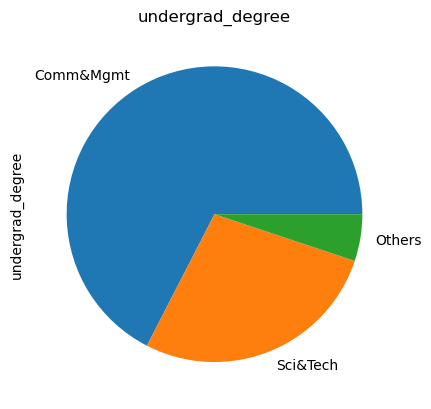

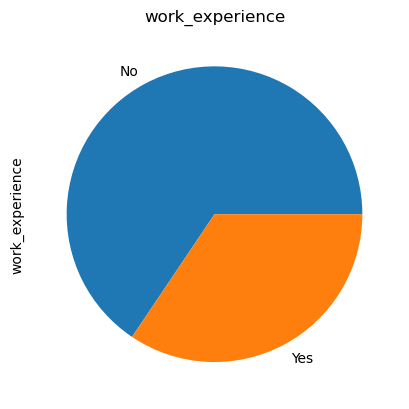

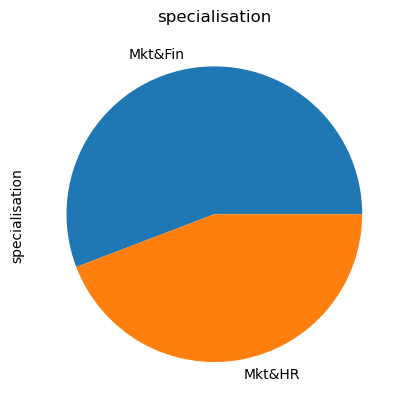

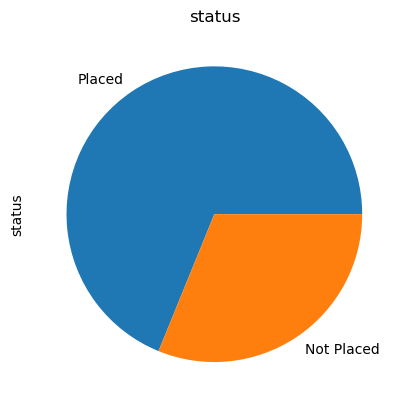

In [11]:
for j in categorical_features.columns:
    plt.figure()
    Df[j].value_counts().plot(kind='pie')
    plt.title(j)



# Exploring numerical features

In [12]:
numerical_features=Df.select_dtypes(include='float')
numerical_features

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
0,67.00,91.00,58.00,55.0,58.80
1,79.33,78.33,77.48,86.5,66.28
2,65.00,68.00,64.00,75.0,57.80
3,56.00,52.00,52.00,66.0,59.43
4,85.80,73.60,73.30,96.8,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49
211,58.00,60.00,72.00,74.0,53.62
212,67.00,67.00,73.00,59.0,69.72
213,74.00,66.00,58.00,70.0,60.23


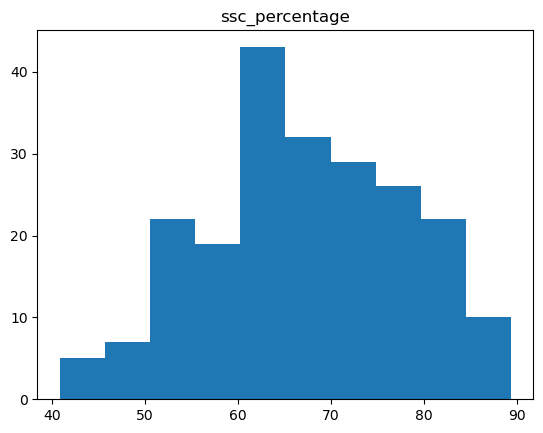

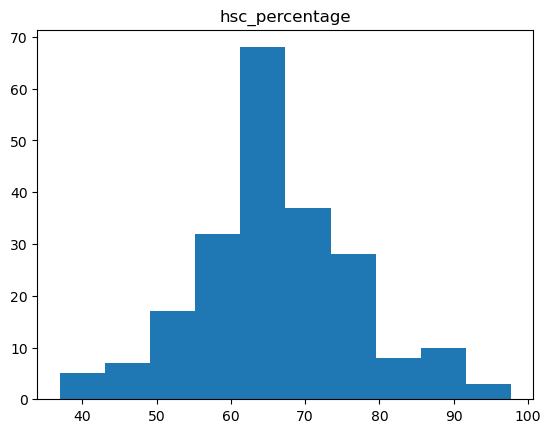

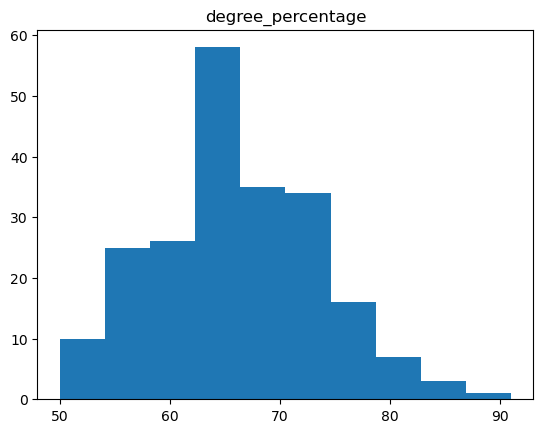

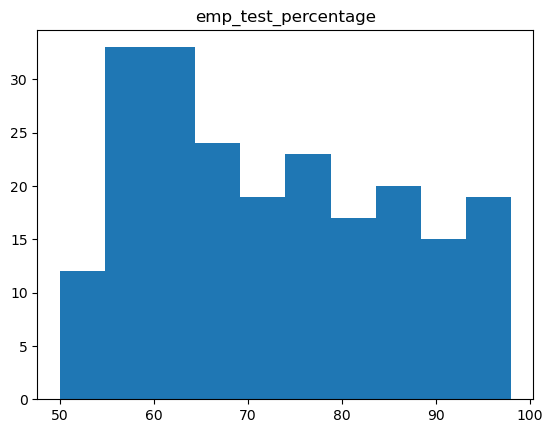

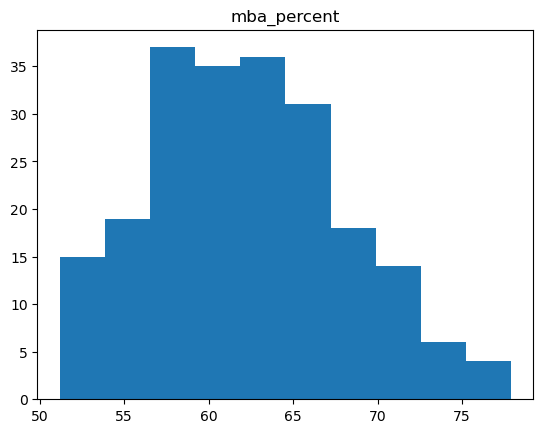

In [13]:
for i in numerical_features.columns:
    plt.figure()
    plt.hist(numerical_features[i])
    plt.title(i)
    

if there is null value in normally distributed data we should fill them with mean value , if we get righ-skewed or left-skewed dataset we should fill null value with median value

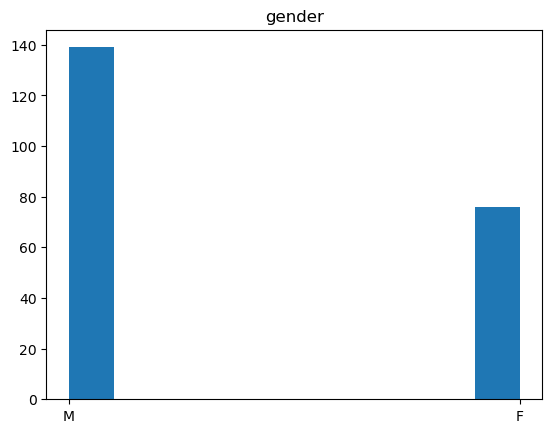

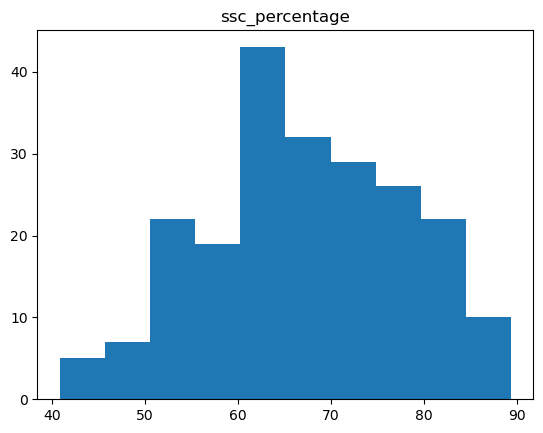

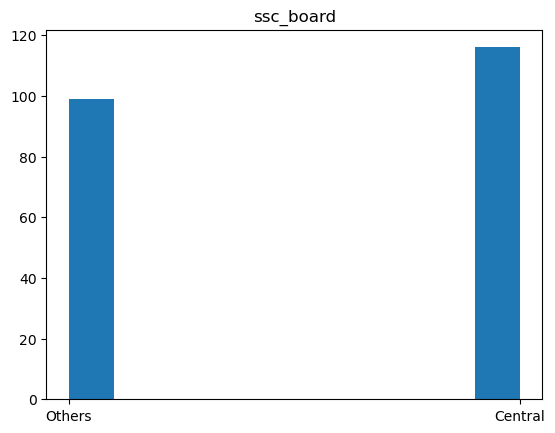

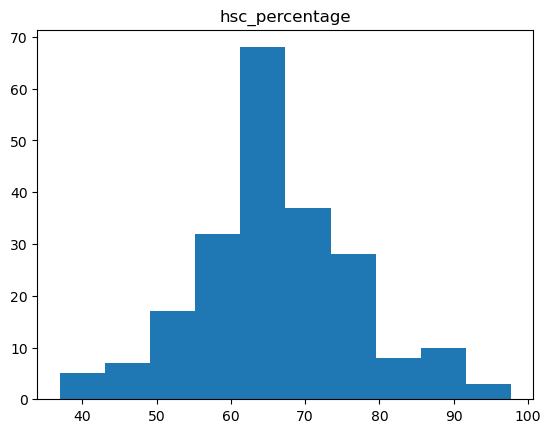

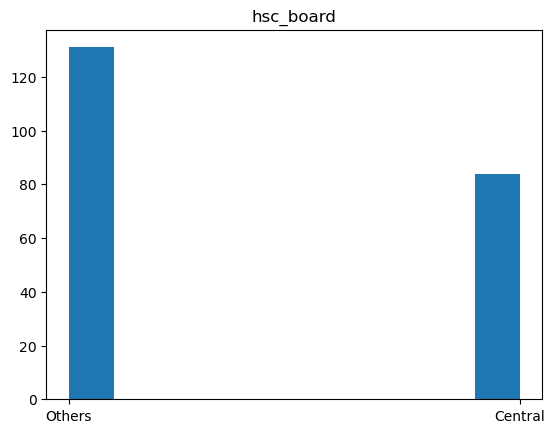

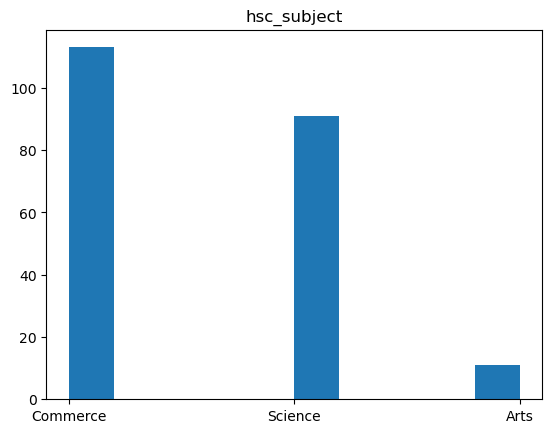

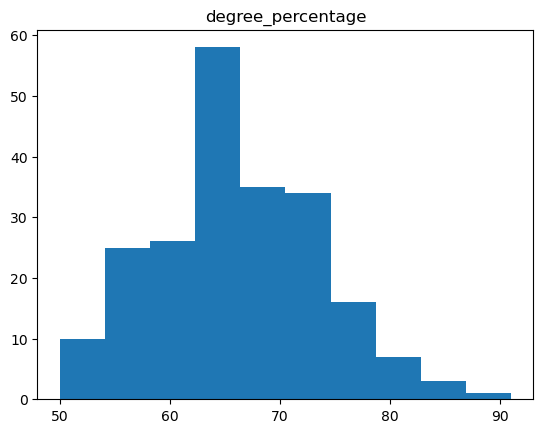

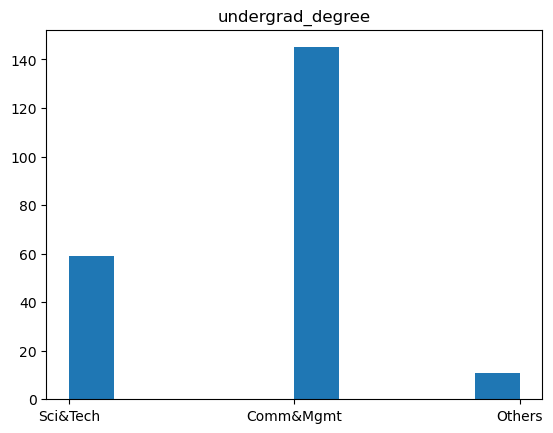

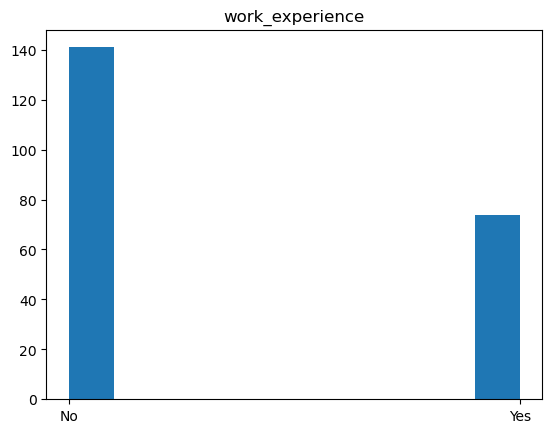

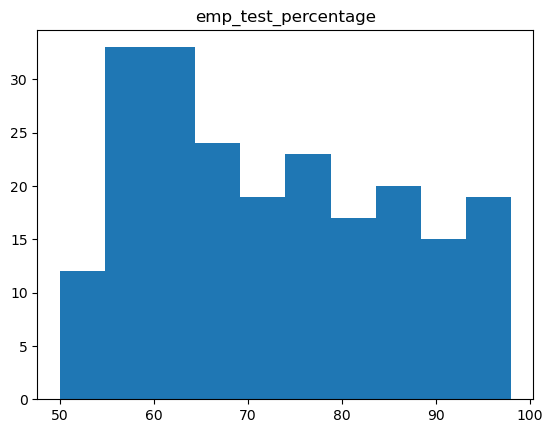

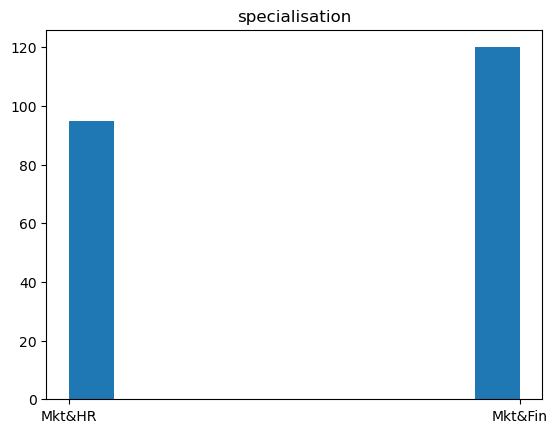

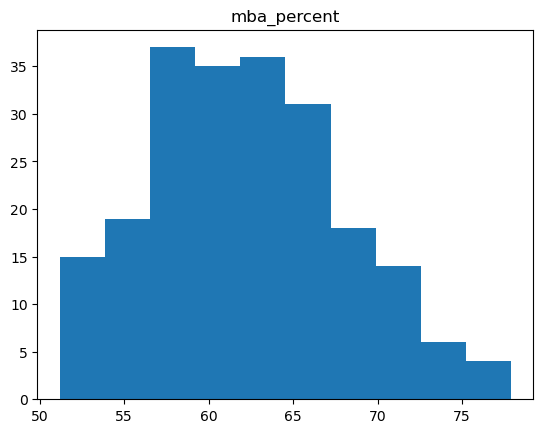

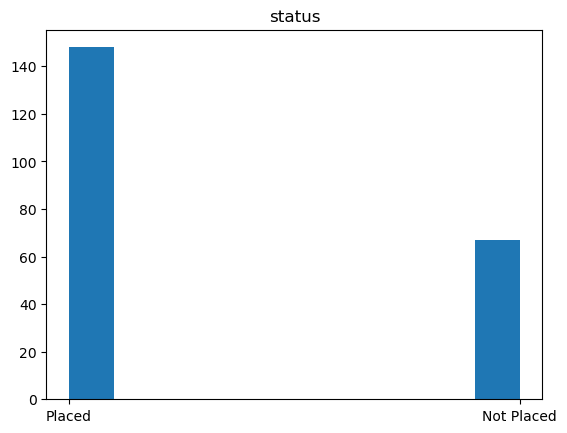

In [14]:
for i in Df.columns:
    plt.figure()
    plt.hist(Df[i])
    plt.title(i)

{'whiskers': [<matplotlib.lines.Line2D at 0x2168555eef0>,
 'caps': [<matplotlib.lines.Line2D at 0x2168555f430>,
 'boxes': [<matplotlib.lines.Line2D at 0x2168555ec50>,
 'medians': [<matplotlib.lines.Line2D at 0x2168555f970>,
 'fliers': [<matplotlib.lines.Line2D at 0x2168555feb0>,
 'means': [<matplotlib.lines.Line2D at 0x2168555fc10>,
  <matplotlib.lines.Line2D at 0x216855cd060>]}

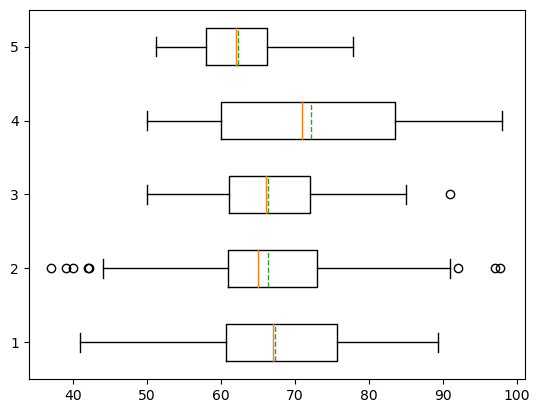

In [15]:
plt.boxplot(numerical_features,meanline=True,showmeans=True,vert=False)

Checking numerical features for outlier detection

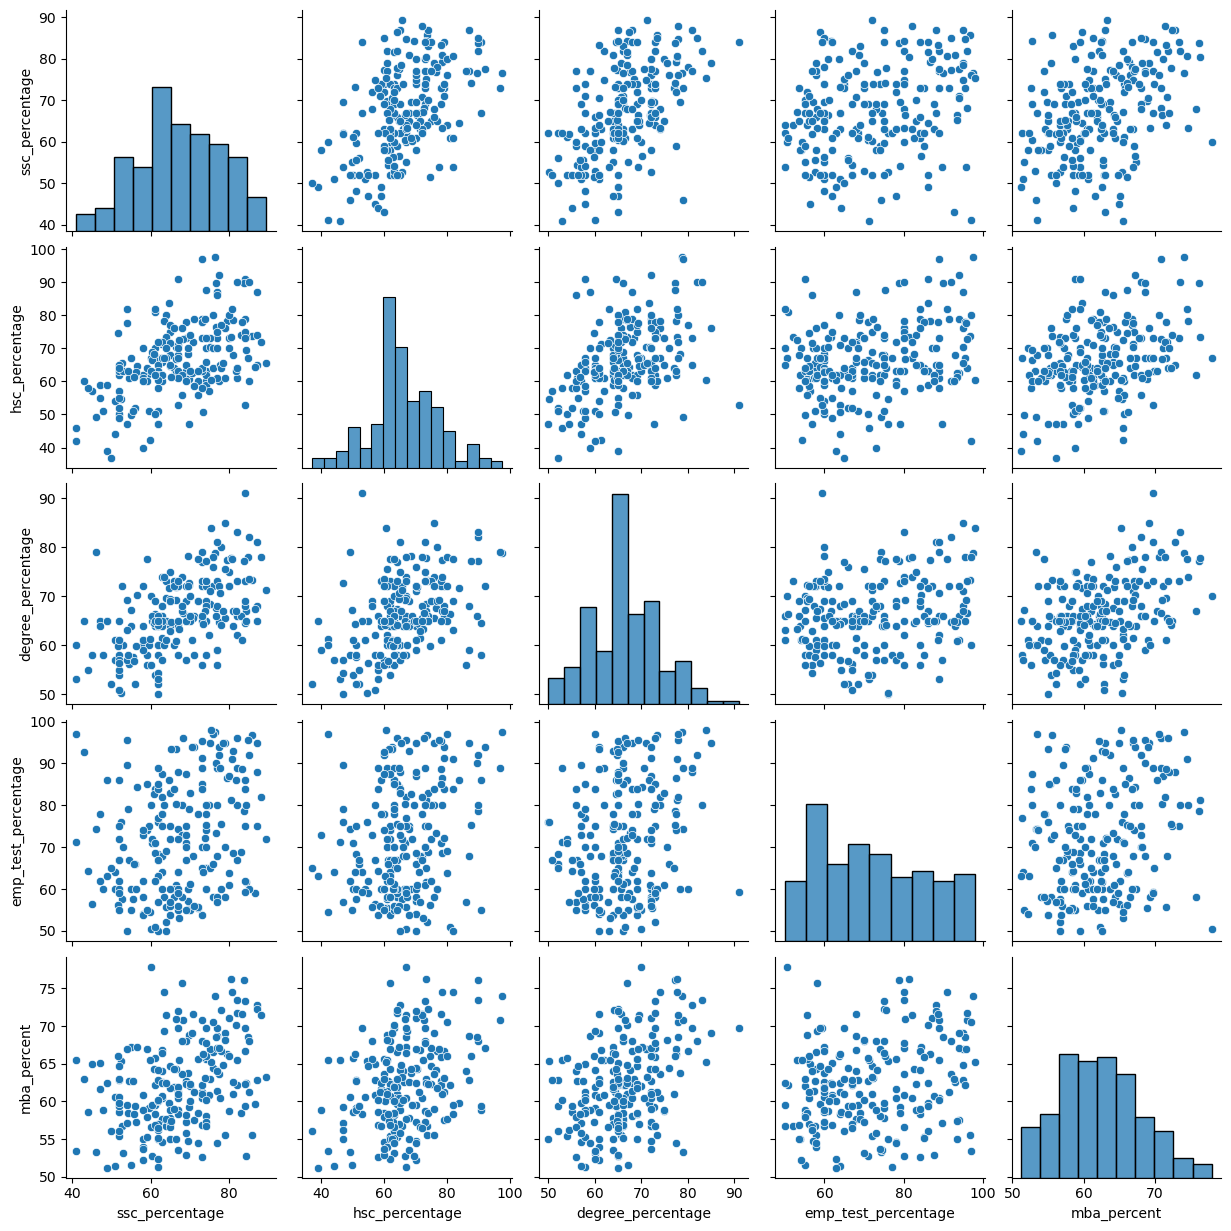

In [16]:
sns.pairplot(Df)

C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\1467425734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=Df.corr()
C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\1467425734.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Df.corr(),xticklabels=corr.columns,yticklabels=corr.columns,vmin=-1,vmax=1,annot=True)


<Axes: >

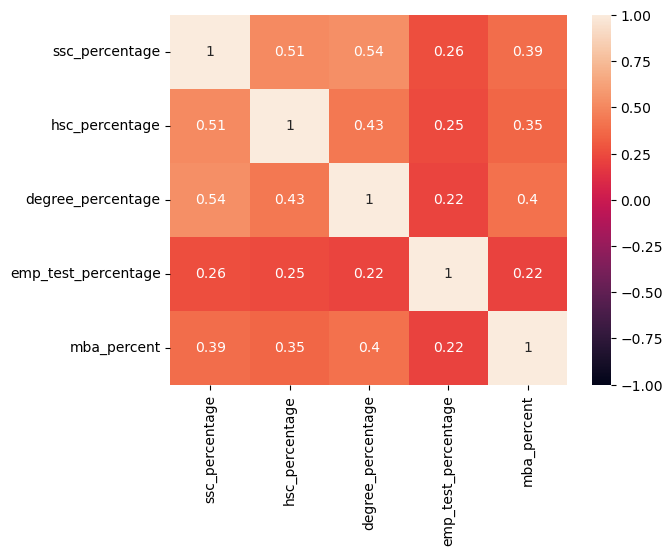

In [17]:
corr=Df.corr()
sns.heatmap(Df.corr(),xticklabels=corr.columns,yticklabels=corr.columns,vmin=-1,vmax=1,annot=True)

In [18]:
Df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [19]:
X_categoric_and_numeric=Df.drop('status',axis=1)
X_categoric_and_numeric

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23


In [20]:
y=pd.get_dummies(Df['status']).drop('Not Placed',axis=1)
y

,Placed
0,1
1,1
2,1
3,0
4,1
...,...
210,1
211,1
212,1
213,1


In [21]:
dummy_features=pd.get_dummies(categorical_features).drop(['gender_F','ssc_board_Central','hsc_board_Others','hsc_subject_Arts','undergrad_degree_Others','work_experience_No','specialisation_Mkt&Fin','status_Placed','status_Not Placed'],axis=1)
dummy_features

,gender_M,ssc_board_Others,hsc_board_Central,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Comm&Mgmt,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR
0,1,1,0,1,0,0,1,0,1
1,1,0,0,0,1,0,1,1,0
2,1,0,1,0,0,1,0,0,0
3,1,0,1,0,1,0,1,0,1
4,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
210,1,1,0,1,0,1,0,0,0
211,1,1,0,0,1,0,1,0,0
212,1,1,0,1,0,1,0,1,0
213,0,1,0,1,0,1,0,0,1


In [22]:
X=pd.concat([dummy_features,numerical_features],axis=1)
X

,gender_M,ssc_board_Others,hsc_board_Central,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Comm&Mgmt,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
0,1,1,0,1,0,0,1,0,1,67.00,91.00,58.00,55.0,58.80
1,1,0,0,0,1,0,1,1,0,79.33,78.33,77.48,86.5,66.28
2,1,0,1,0,0,1,0,0,0,65.00,68.00,64.00,75.0,57.80
3,1,0,1,0,1,0,1,0,1,56.00,52.00,52.00,66.0,59.43
4,1,0,1,1,0,1,0,0,0,85.80,73.60,73.30,96.8,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,1,0,1,0,1,0,0,0,80.60,82.00,77.60,91.0,74.49
211,1,1,0,0,1,0,1,0,0,58.00,60.00,72.00,74.0,53.62
212,1,1,0,1,0,1,0,1,0,67.00,67.00,73.00,59.0,69.72
213,0,1,0,1,0,1,0,0,1,74.00,66.00,58.00,70.0,60.23


In [23]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [24]:
logmodel=LogisticRegression(max_iter=1000,penalty='none')

# Feature selection using by EFS

In [25]:
#efs=EFS(logmodel,
 #       min_features=1,
  #      max_features=14,
   #     scoring='accuracy',
    #    cv=5,
     #   n_jobs=-1
      #  
       #)


#efs.fit(X_train,y_train)

In [26]:
#print('Best accuracy score: %.2f' % efs.best_score_)
#print('Best subset (indices):', efs.best_idx_)
#print('Best subset (corresponding names):', efs.best_feature_names_)

In [27]:
X_efs=X.iloc[:,[2, 4, 5, 7, 9, 11, 13]]
X_efs

,hsc_board_Central,hsc_subject_Science,undergrad_degree_Comm&Mgmt,work_experience_Yes,ssc_percentage,degree_percentage,mba_percent
0,0,0,0,0,67.00,58.00,58.80
1,0,1,0,1,79.33,77.48,66.28
2,1,0,1,0,65.00,64.00,57.80
3,1,1,0,0,56.00,52.00,59.43
4,1,0,1,0,85.80,73.30,55.50
...,...,...,...,...,...,...,...
210,0,0,1,0,80.60,77.60,74.49
211,0,1,0,0,58.00,72.00,53.62
212,0,0,1,1,67.00,73.00,69.72
213,0,0,1,0,74.00,58.00,60.23


In [28]:
feature_names=tuple(X.columns)
feature_names

('gender_M',
 'ssc_board_Others',
 'hsc_board_Central',
 'hsc_subject_Commerce',
 'hsc_subject_Science',
 'undergrad_degree_Comm&Mgmt',
 'undergrad_degree_Sci&Tech',
 'work_experience_Yes',
 'specialisation_Mkt&HR',
 'ssc_percentage',
 'hsc_percentage',
 'degree_percentage',
 'emp_test_percentage',
 'mba_percent')

# Feature selection using by SFS

In [29]:
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#sfs1=SFS(logmodel,
#         k_features='best',
 #        forward=True,
  #       floating=False,
   #      verbose=2,
    #     scoring='accuracy',
     #    cv=2,
      #   n_jobs=-1)


In [30]:
#sfs1.fit(X_train,y_train)

In [31]:
#sfs1.subsets_

In [32]:
#from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs
#fig1=plt_sfs(sfs1.get_metric_dict(confidence_interval=0.95),kind='std_err')

In [33]:
#Data=pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
#Data[['feature_idx','avg_score']].sort_values('avg_score',ascending=False)

In [34]:
X_sfs=X.iloc[:,[0, 1,2, 7, 9, 11, 13]]
X_sfs

,gender_M,ssc_board_Others,hsc_board_Central,work_experience_Yes,ssc_percentage,degree_percentage,mba_percent
0,1,1,0,0,67.00,58.00,58.80
1,1,0,0,1,79.33,77.48,66.28
2,1,0,1,0,65.00,64.00,57.80
3,1,0,1,0,56.00,52.00,59.43
4,1,0,1,0,85.80,73.30,55.50
...,...,...,...,...,...,...,...
210,1,1,0,0,80.60,77.60,74.49
211,1,1,0,0,58.00,72.00,53.62
212,1,1,0,1,67.00,73.00,69.72
213,0,1,0,0,74.00,58.00,60.23


# Model selection for using EFS features

In [35]:
X_train_efs,X_test_efs,y_train_efs,y_test_efs=train_test_split(X_efs,y,test_size=0.2,random_state=0,stratify=y)

# Standardization the data

In [36]:
scaler=preprocessing.StandardScaler()
scaler.fit(X_train_efs)
X_train_efs_standart=scaler.transform(X_train_efs)
X_test_efs_standart=scaler.transform(X_test_efs)


# 1-) Knn

In [37]:
A=[]
i=2
while i<10:
    knn1=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn1,X_train_efs_standart,y_train_efs,scoring='accuracy',cv=5)
    A.append([score.mean(),i])
    i=i+1
A

C:\Users\Hüseyin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Hüseyin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Hüseyin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Hüseyin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

[[0.7956302521008404, 2],
 [0.8196638655462186, 3],
 [0.8080672268907563, 4],
 [0.8198319327731094, 5],
 [0.8194957983193276, 6],
 [0.8255462184873951, 7],
 [0.8371428571428572, 8],
 [0.8253781512605043, 9]]

In [38]:
pd.DataFrame(A,columns=['score','neigborsize']).sort_values('score',ascending=False)

,score,neigborsize
6,0.837143,8
5,0.825546,7
7,0.825378,9
3,0.819832,5
1,0.819664,3
4,0.819496,6
2,0.808067,4
0,0.795630,2


In [39]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_efs_standart,y_train_efs)
knn.score(X_test_efs_standart,y_test_efs)

C:\Users\Hüseyin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8604651162790697

In [40]:
knn_predict=knn.predict(X_test_efs_standart)
confusion_matrix(y_test_efs,knn_predict)

array([[ 9,  4],
       [ 2, 28]], dtype=int64)

# 2-) Naive Bayes

In [41]:
nb=GaussianNB()
nb.fit(X_train_efs_standart,y_train_efs)
nb.score(X_test_efs_standart,y_test_efs)

C:\Users\Hüseyin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8372093023255814

In [42]:
naive_predict=nb.predict(X_test_efs_standart)
confusion_matrix(y_test_efs,naive_predict)

array([[11,  2],
       [ 5, 25]], dtype=int64)

# 3-)Logistic Regression

In [43]:
logmodel_=LogisticRegression(max_iter=1000,random_state=0)
logmodel_.fit(X_train_efs_standart,y_train_efs)
logmodel_.score(X_test_efs_standart,y_test_efs)

C:\Users\Hüseyin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8604651162790697

In [44]:
logmodel_predict=logmodel_.predict(X_test_efs_standart)
confusion_matrix(y_test_efs,logmodel_predict)

array([[10,  3],
       [ 3, 27]], dtype=int64)

In [45]:
probabilities=logmodel_.predict_proba(X_test_efs_standart)
pd.concat((pd.DataFrame(probabilities),y_test_efs.reset_index()),axis=1)

,0,1,index,Placed
0,0.516061,0.483939,141,0
1,0.049281,0.950719,71,1
2,0.215668,0.784332,55,1
3,0.539904,0.460096,167,0
4,0.506334,0.493666,92,1
5,0.895175,0.104825,159,0
6,0.529407,0.470593,19,1
7,0.797133,0.202867,189,0
8,0.401574,0.598426,211,1
9,0.009346,0.990654,61,1


In [46]:
names=[logmodel_,knn,nb]
final_scores=[]
for i in names:
    s=cross_val_score(i,X_train_efs_standart,y_train_efs,scoring='accuracy',cv=5)
    final_scores.append([s.mean(),i])
pd.DataFrame(final_scores,columns=['cross val score','model name'])
    


C:\Users\Hüseyin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hüseyin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hüseyin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hüseyin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

,cross val score,model name
0,0.866218,"LogisticRegression(max_iter=1000, random_state=0)"
1,0.837143,KNeighborsClassifier(n_neighbors=8)
2,0.813782,GaussianNB()


In [47]:
logmodel_.score(X_test_efs_standart,y_test_efs)

0.8604651162790697

In [48]:
array_y=np.array(y_test_efs)[:,0]
array_y

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
      dtype=uint8)

In [49]:
array_probability=np.array(pd.DataFrame(probabilities).drop(0,axis=1))[:,0]
array_probability

array([0.48393889, 0.95071876, 0.78433166, 0.46009582, 0.49366576,
       0.10482518, 0.47059302, 0.20286741, 0.59842646, 0.99065419,
       0.02805879, 0.15442876, 0.93071498, 0.97796711, 0.99828634,
       0.78482947, 0.96720082, 0.65852799, 0.85708165, 0.994085  ,
       0.61917048, 0.14756691, 0.90931352, 0.67164026, 0.99439605,
       0.86915859, 0.95279015, 0.86561483, 0.96293187, 0.98210161,
       0.73788253, 0.27981687, 0.60237528, 0.98996851, 0.52601294,
       0.96038484, 0.00315297, 0.91063322, 0.90940385, 0.73161819,
       0.25113791, 0.99527907, 0.14728076])

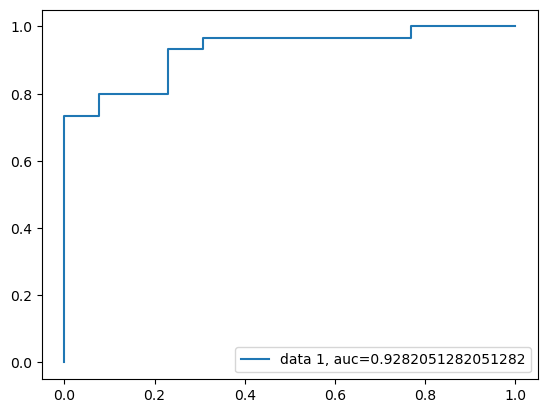

In [50]:
fpr,tpr,_=roc_curve(array_y,array_probability)
auc=roc_auc_score(array_y,array_probability)
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

# 4-)Decision Tree

In [51]:
Classifier=DecisionTreeClassifier()
path=Classifier.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.        , 0.00528541, 0.00572845, 0.00775194, 0.00872093,
        0.00880902, 0.00885936, 0.00930233, 0.01541645, 0.01574357,
        0.01634367, 0.01640508, 0.01984966, 0.02156084, 0.03613996,
        0.15828396]),
 'impurities': array([0.        , 0.01057082, 0.02202773, 0.02977967, 0.0385006 ,
        0.04730962, 0.05616898, 0.0654713 , 0.08088775, 0.09663133,
        0.12931867, 0.19493898, 0.21478863, 0.23634947, 0.27248943,
        0.43077339])}

In [52]:
Scoress=[]
for j in path.ccp_alphas:
    classy=DecisionTreeClassifier(ccp_alpha=j)
    accuracy=cross_val_score(classy,X_train_efs,y_train_efs,cv=5,scoring='accuracy')
    Scoress.append([j,accuracy.mean()])
    df=pd.DataFrame(Scoress,columns=['alpha','cross_val_score'])
df.sort_values('cross_val_score',ascending=False)

,alpha,cross_val_score
8,0.015416,0.796303
9,0.015744,0.796303
12,0.019850,0.796303
13,0.021561,0.796303
4,0.008721,0.790756
5,0.008809,0.790588
10,0.016344,0.790420
11,0.016405,0.790420
3,0.007752,0.778992
6,0.008859,0.778992


In [53]:
TreeClassifier=DecisionTreeClassifier(ccp_alpha=0.008809)
TreeClassifier.fit(X_train,y_train)
TreeClassifier.score(X_test,y_test)

0.7441860465116279

In [54]:
tree_predict=TreeClassifier.predict(X_test)

In [55]:
confusion_matrix(tree_predict,y_test)

array([[ 6,  4],
       [ 7, 26]], dtype=int64)

In [56]:
classifier_prob=TreeClassifier.predict_proba(X_test)
classifier_prob

array([[0.        , 1.        ],
       [0.01470588, 0.98529412],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.01470588, 0.98529412],
       [0.        , 1.        ],
       [0.01470588, 0.98529412],
       [0.01470588, 0.98529412],
       [0.        , 1.        ],
       [0.01470588, 0.98529412],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.01470588, 0.98529412],
       [0.        , 1.        ],
       [0.01470588, 0.98529412],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.01470588, 0.98529412],
       [0.01470588, 0.98529412],
       [0.        , 1.        ],
       [0.01470588, 0.98529412],
       [0.01470588, 0.98529412],
       [1.        , 0.        ],
       [0.01470588, 0.98529412],
       [1.

# 5-)Bagging

In [57]:
from sklearn.ensemble import BaggingClassifier,BaggingRegressor

In [58]:
bag=BaggingClassifier(TreeClassifier,n_estimators=100,random_state=45,oob_score=True)
bag.fit(X_train_efs,y_train_efs)
print('accuracy score:' ,bag.score(X_test_efs,y_test_efs),'oob_accuracy:',bag.oob_score_)

accuracy score: 0.813953488372093 oob_accuracy: 0.8313953488372093


C:\Users\Hüseyin\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 6-) Random Forest

In [59]:
clf=RandomForestClassifier(n_estimators=100,random_state=12,oob_score=True)
clf.fit(X_train,y_train)

print('accuracy score:' ,clf.score(X_test,y_test),'oob_accuracy:',clf.oob_score_)

accuracy score:

C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\259178191.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


 0.813953488372093 oob_accuracy: 0.8430232558139535


In [60]:
oob_accuracy=[]
for i in np.linspace(start=50,stop=500,num=10):
    clf=RandomForestClassifier(n_estimators=int(i),random_state=3,oob_score=True)
    clf.fit(X_train,y_train)
    oob_accuracy.append([i,clf.oob_score_])
df=pd.DataFrame(oob_accuracy,columns=['Number of trees','oob accuracy'])
df.sort_values('oob accuracy',ascending=False)

C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\2616785624.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\2616785624.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\2616785624.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\2616785624.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_tra

,Number of trees,oob accuracy
3,200.0,0.872093
7,400.0,0.860465
8,450.0,0.860465
4,250.0,0.854651
1,100.0,0.848837
5,300.0,0.848837
9,500.0,0.848837
0,50.0,0.837209
2,150.0,0.837209
6,350.0,0.837209


In [61]:
clf=RandomForestClassifier(n_estimators=200,random_state=45,oob_score=True)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\2131962.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


0.8604651162790697

In [62]:
oob_accuracy=[]
for i in range(1,9):
    clf=RandomForestClassifier(n_estimators=200,random_state=90,oob_score=True,max_features=i)
    clf.fit(X_train,y_train)
    oob_accuracy.append([i,clf.oob_score_])
df=pd.DataFrame(oob_accuracy,columns=['Number of features','oob accuracy'])
df.sort_values('oob accuracy',ascending=False)

C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\3126370297.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\3126370297.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\3126370297.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\3126370297.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_tra

,Number of features,oob accuracy
5,6,0.877907
0,1,0.872093
1,2,0.860465
3,4,0.860465
2,3,0.854651
4,5,0.854651
6,7,0.854651
7,8,0.843023


In [63]:
clf=RandomForestClassifier(n_estimators=200,max_features=6,random_state=49,oob_score=True)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\1016272972.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


0.813953488372093

# parameter tuning with GridSearchCV for RandomForest

In [64]:
clf=RandomForestClassifier(random_state=99)
my_n_estimators=[100,200,300,400,500,600]
my_max_features=[1,2,3,4,5,6,7,8]
params={
    'n_estimators':my_n_estimators,
    'max_features':my_max_features
}

In [65]:
clf_grid=GridSearchCV(clf,param_grid=params,cv=5,scoring='accuracy',n_jobs=-1,verbose=2)
clf_grid.fit(X_train,y_train)
print(clf_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_features': 2, 'n_estimators': 100}


C:\Users\Hüseyin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [66]:
clf=RandomForestClassifier(n_estimators=100,max_features=2,oob_score=True,random_state=43)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\Hüseyin\AppData\Local\Temp\ipykernel_10576\3892865442.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


0.8837209302325582

In [67]:
clf.feature_importances_

array([0.03122926, 0.01886303, 0.01274273, 0.01451774, 0.01364734,
       0.01461535, 0.01101713, 0.0382143 , 0.02936174, 0.26563465,
       0.16448621, 0.19682708, 0.08784232, 0.10100111])

In [68]:
feature_importances=pd.DataFrame(clf.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
ssc_percentage,0.265635
degree_percentage,0.196827
hsc_percentage,0.164486
mba_percent,0.101001
emp_test_percentage,0.087842
work_experience_Yes,0.038214
gender_M,0.031229
specialisation_Mkt&HR,0.029362
ssc_board_Others,0.018863
undergrad_degree_Comm&Mgmt,0.014615


# 7-)SVM